In [ ]:
import sys
!{sys.executable} -m pip install pycaret

In [ ]:
import pandas as pd
import pycaret
import seaborn as sns
import missingno as msno
import numpy as np
import plotly.express as px
from pycaret.classification import *
sns.set()
sns.set_context("paper")
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/pancreas.csv', index_col = 0)
print("The data has the shape: ",df.shape)

The data has the shape:  (590, 13)


# New Section

In [ ]:
df.diagnosis.value_counts().sort_index()

1    183
2    208
3    199
Name: diagnosis, dtype: int64

In [ ]:
df.head()

,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
sample_id,,,,,,,,,,,,,
S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


<Axes: >

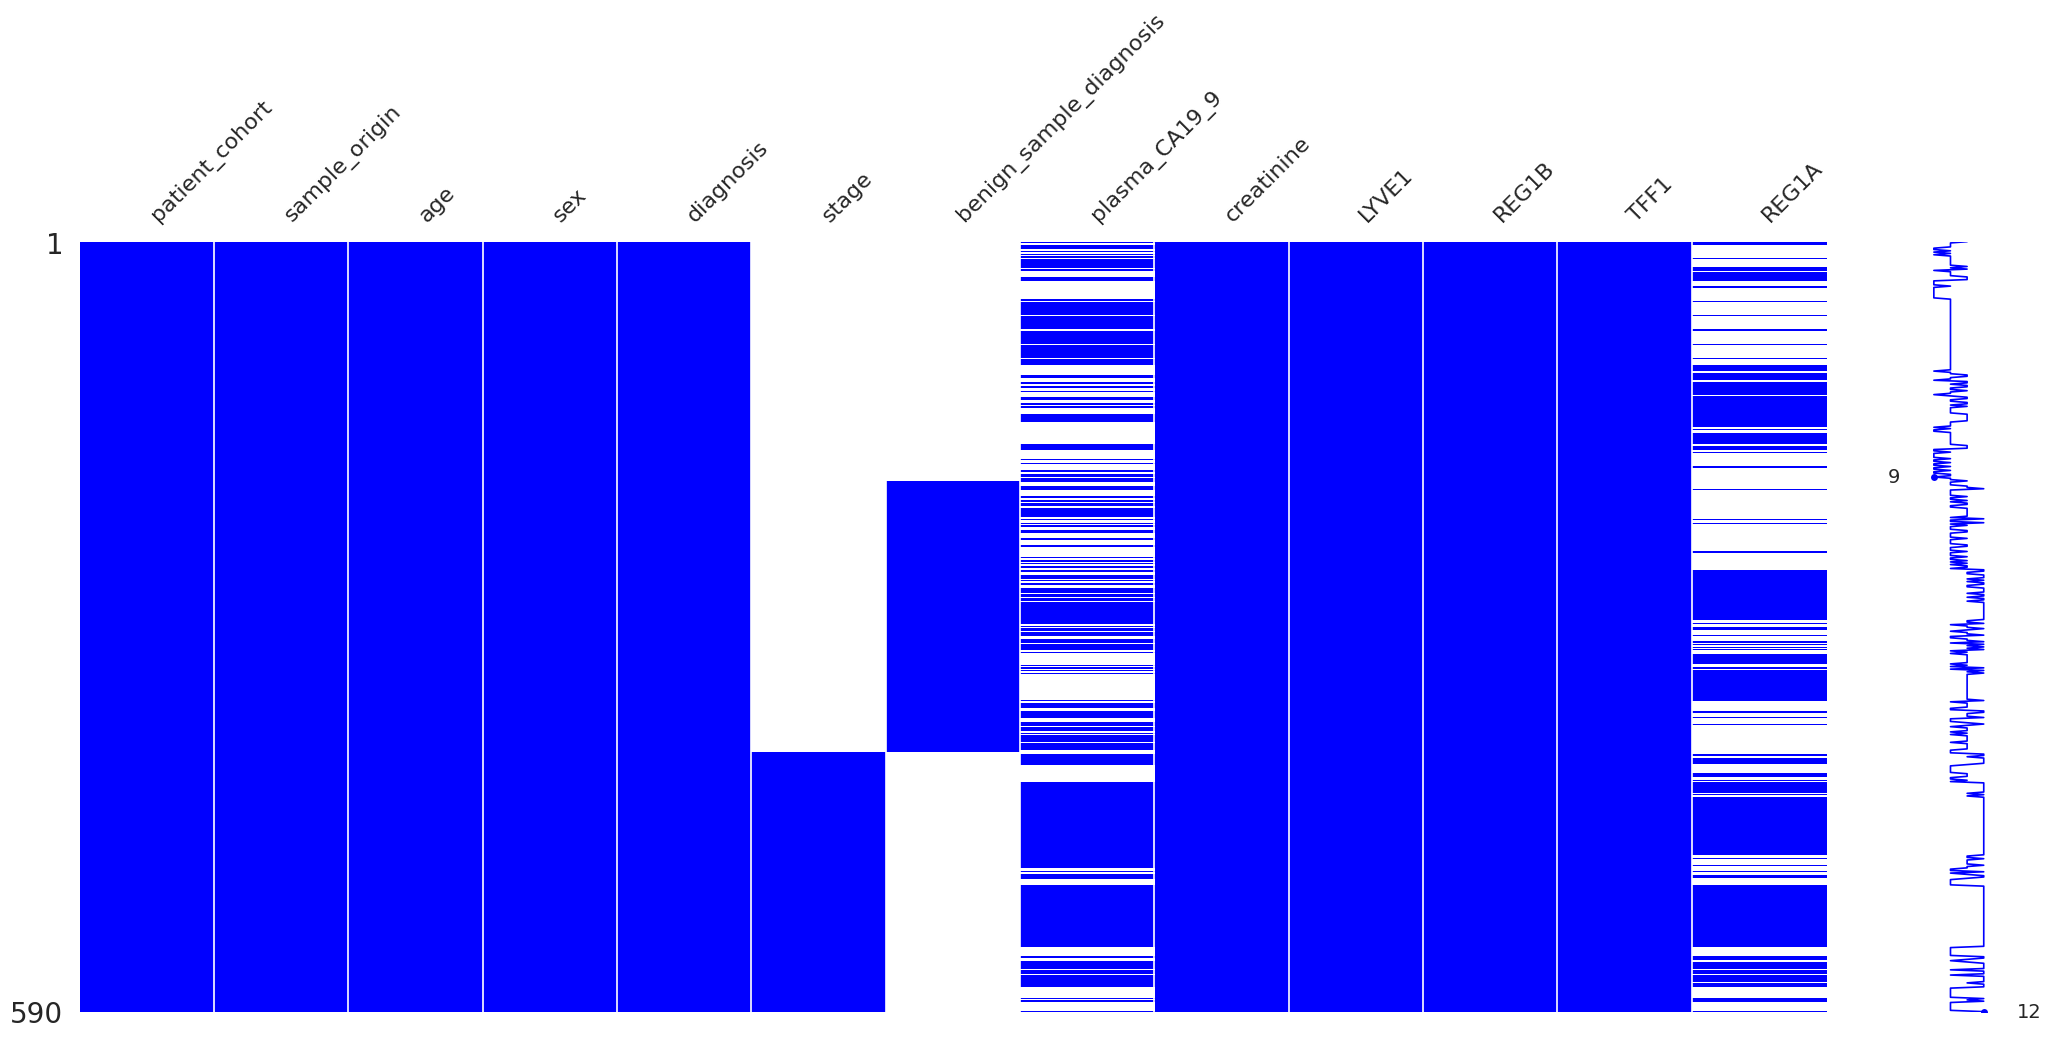

In [ ]:
#missing values
# msno.matrix(df)
msno.matrix(df, color = (0, 0, 1))

In [ ]:
pd.read_csv('/content/panstage.csv', index_col = 0)[['Details']]

,Details
Column name,
sample_id,Unique string identifying each subject
patient_cohort,"Cohort 1, previously used samples; Cohort 2, newly added samples"
sample_origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK"
age,Age in years
sex,"M = male, F = female"
diagnosis,"1 = control (no pancreatic disease), 2 = benign hepatobiliary disease (119 of which are chronic pancreatitis); 3 = Pancreatic ductal adenocarcinoma, i.e. pancreatic cancer"
stage,"For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV"
benign_sample_diagnosis,"For those with a benign, non-cancerous diagnosis, what was the diagnosis?"
plasma_CA19_9,Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).


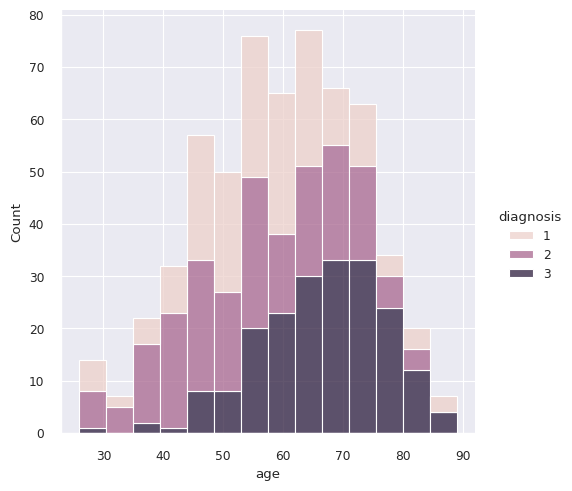

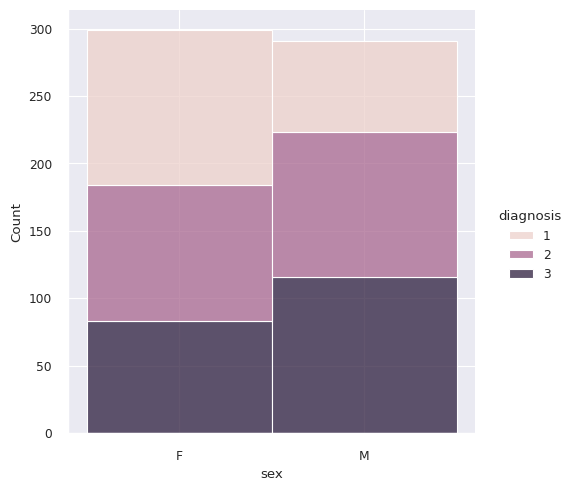

In [ ]:
for feature in ['age','sex']:
    sns.displot(df,x= feature, hue="diagnosis", multiple='stack')

In [ ]:
groups = df.groupby('diagnosis').mean()
groups.style.highlight_max()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
diagnosis,,,,,,,
1,56.333333,8.749569,0.797633,1.212887,41.327901,169.024140,227.871886
2,54.701923,61.785741,0.847929,2.084612,64.174510,448.256897,547.458092
3,66.180905,1476.154733,0.916281,5.788567,226.308587,1148.611527,1138.323721


In [ ]:
corr = df.corr().diagnosis.sort_values(ascending = False)
corr = corr.to_frame()
corr

,diagnosis
diagnosis,1.000000
LYVE1,0.540384
TFF1,0.392613
REG1B,0.383516
age,0.308251
plasma_CA19_9,0.263950
REG1A,0.260110
creatinine,0.074888


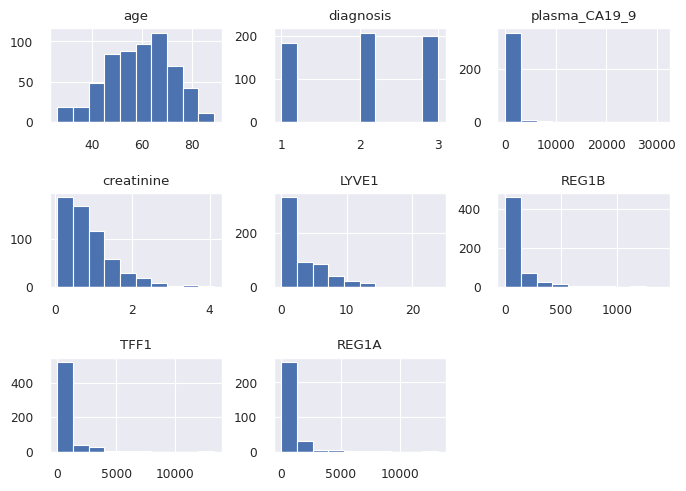

In [ ]:
df.hist()
plt.subplots_adjust(hspace=.75)

In [ ]:
features_to_ignore = ['patient_cohort', 'sample_origin','stage','benign_sample_diagnosis']
s = setup(df, target = 'diagnosis', experiment_name = 'pancreas', session_id = 71, ignore_features = features_to_ignore, train_size = 0.8)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(590, 13)"
5,Transformed data shape,"(590, 9)"
6,Transformed train set shape,"(472, 9)"
7,Transformed test set shape,"(118, 9)"
8,Ignore features,4
9,Ordinal features,1


In [ ]:
best = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7161,0.8732,0.7161,0.7222,0.7151,0.5739,0.5772,0.3810
xgboost,Extreme Gradient Boosting,0.7139,0.8742,0.7139,0.7237,0.7134,0.5703,0.5748,0.2250
gbc,Gradient Boosting Classifier,0.7136,0.8692,0.7136,0.7197,0.7129,0.5696,0.5724,1.1760
et,Extra Trees Classifier,0.6843,0.8467,0.6843,0.6919,0.6844,0.5258,0.5284,0.3730
rf,Random Forest Classifier,0.6736,0.8577,0.6736,0.6816,0.6739,0.5097,0.5128,0.6590
knn,K Neighbors Classifier,0.6335,0.7876,0.6335,0.6424,0.6326,0.4501,0.4539,0.0890
ada,Ada Boost Classifier,0.6161,0.7391,0.6161,0.6339,0.6170,0.4223,0.4256,0.3040
lr,Logistic Regression,0.6015,0.7773,0.6015,0.6110,0.5979,0.4042,0.4106,1.0290
dt,Decision Tree Classifier,0.5928,0.6945,0.5928,0.5920,0.5900,0.3892,0.3907,0.0750
lda,Linear Discriminant Analysis,0.5612,0.7555,0.5612,0.5737,0.5634,0.3421,0.3442,0.1290


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# tuning the model
tuned = tune_model(best[0])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9026,0.7500,0.7525,0.7508,0.6240,0.6244
1,0.7083,0.8905,0.7083,0.7054,0.7064,0.5622,0.5626
2,0.7234,0.8726,0.7234,0.7301,0.7248,0.5844,0.5860
3,0.6809,0.8557,0.6809,0.6880,0.6840,0.5211,0.5214
4,0.6596,0.7935,0.6596,0.6757,0.6629,0.4884,0.4925
5,0.6596,0.8050,0.6596,0.6694,0.6610,0.4895,0.4918
6,0.6809,0.8449,0.6809,0.6760,0.6752,0.5224,0.5248
7,0.6596,0.8730,0.6596,0.6596,0.6596,0.4877,0.4877
8,0.7447,0.8726,0.7447,0.7376,0.7392,0.6163,0.6180


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


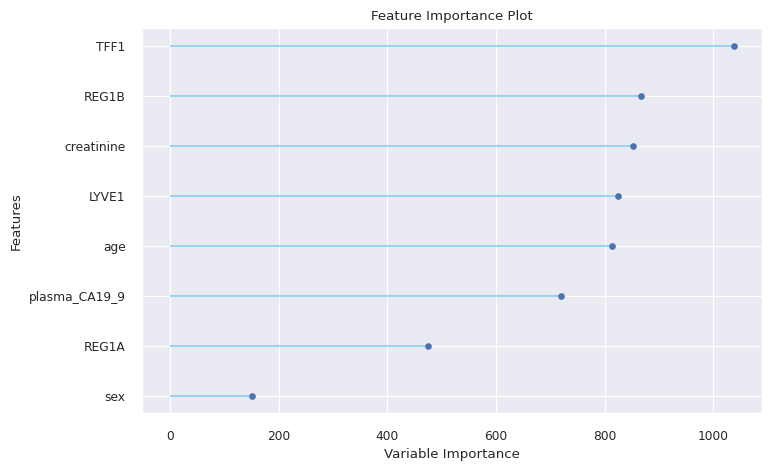

In [ ]:
plot_model(best[0], plot = 'feature')

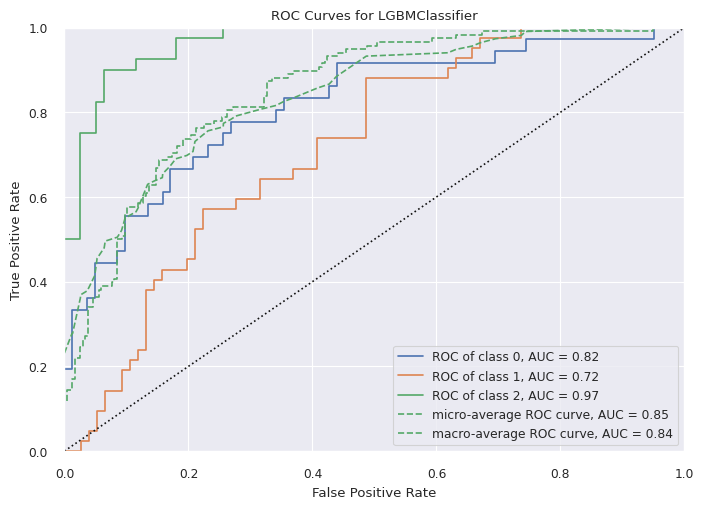

In [ ]:
plot_model(best[0], plot = 'auc')

In [ ]:
predictions = predict_model(best[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6949,0.8326,0.6949,0.6966,0.6955,0.5419,0.5421


In [ ]:
predictions

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis,prediction_label,prediction_score
sample_id,,,,,,,,,,,
S172,71,M,1.983554,0.14703,0.000129,6.424855,0.129430,NaN,1,1,0.9980
S559,67,F,NaN,0.09048,2.959210,29.138000,209.675995,NaN,3,3,0.8317
S255,66,M,52.000000,0.37323,0.592490,19.716000,207.645996,NaN,2,2,0.9580
S242,61,F,10.000000,0.20358,0.680099,54.456001,159.966003,NaN,2,2,0.8332
S438,64,F,1972.000000,0.83694,1.406857,13.618654,431.725952,27.737000,3,3,0.9819
...,...,...,...,...,...,...,...,...,...,...,...
S240,52,F,41.000000,0.33930,0.001357,0.293000,73.736000,NaN,2,2,0.9686
S441,55,M,1004.000000,1.01790,8.776982,150.187317,1050.399536,462.975006,3,3,0.9966
S170,63,F,0.514003,0.30537,0.005305,7.563690,5.304546,NaN,1,1,0.9992


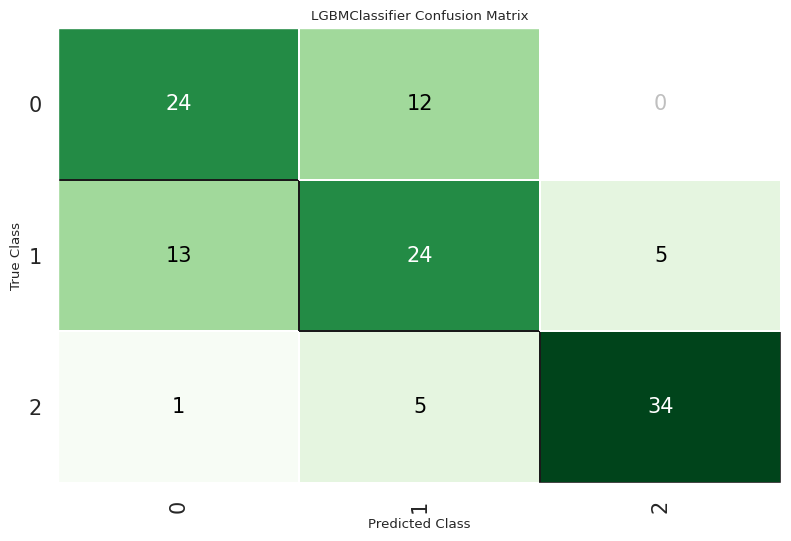

In [ ]:
plot_model(best[0], plot = 'confusion_matrix')

In [ ]:
df.diagnosis = df.diagnosis == 3
s = setup(df, target = 'diagnosis', experiment_name = 'pancreas', session_id = 71, ignore_features = features_to_ignore, train_size = 0.8)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(590, 13)"
4,Transformed data shape,"(590, 9)"
5,Transformed train set shape,"(472, 9)"
6,Transformed test set shape,"(118, 9)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,7


In [ ]:
best = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8772,0.9397,0.7804,0.8535,0.8085,0.7192,0.7262,0.2090
xgboost,Extreme Gradient Boosting,0.8728,0.9294,0.7800,0.8431,0.8019,0.7095,0.7171,0.1200
lightgbm,Light Gradient Boosting Machine,0.8708,0.9281,0.7804,0.8307,0.8008,0.7059,0.7098,0.4530
rf,Random Forest Classifier,0.8582,0.9236,0.7362,0.8324,0.7779,0.6746,0.6804,0.3110
ada,Ada Boost Classifier,0.8494,0.9115,0.7421,0.8031,0.7651,0.6556,0.6615,0.2070
et,Extra Trees Classifier,0.8413,0.9131,0.6921,0.8158,0.7433,0.6305,0.6392,0.2440
lr,Logistic Regression,0.8200,0.8751,0.6158,0.8174,0.6919,0.5699,0.5881,0.1110
dt,Decision Tree Classifier,0.8157,0.7869,0.6979,0.7467,0.7151,0.5801,0.5862,0.0740
ridge,Ridge Classifier,0.8094,0.0000,0.5658,0.8181,0.6609,0.5365,0.5587,0.0720
knn,K Neighbors Classifier,0.8093,0.8616,0.6596,0.7577,0.6998,0.5615,0.5684,0.0900


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
print(best[0])


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=71, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


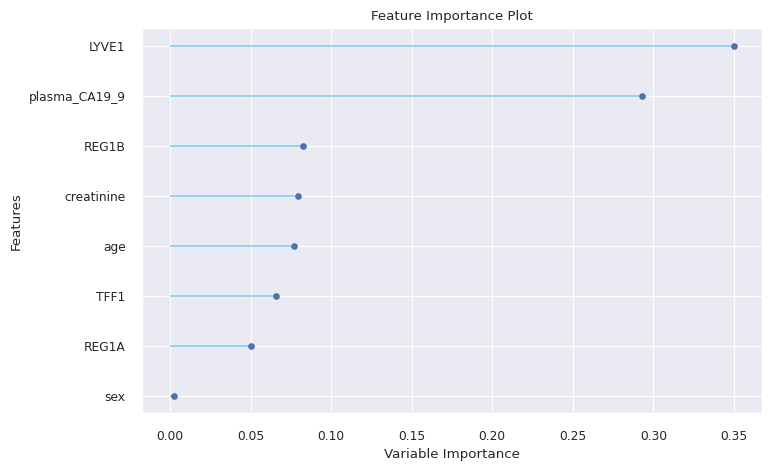

In [ ]:
plot_model(best[0], plot = 'feature')

In [ ]:
print(best[1])


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


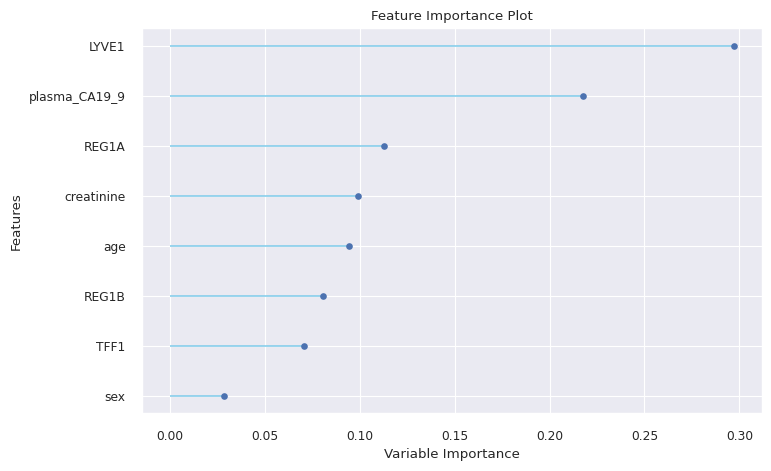

In [ ]:
plot_model(best[1], plot = 'feature')

In [ ]:
# blend top two models
blender = blend_models([best[0],best[1]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9102,0.8125,0.7222,0.7647,0.6364,0.6390
1,0.9167,0.9844,0.8750,0.8750,0.8750,0.8125,0.8125
2,0.8723,0.9625,0.8000,0.8000,0.8000,0.7062,0.7062
3,0.9362,0.9617,0.8750,0.9333,0.9032,0.8557,0.8567
4,0.8085,0.8407,0.6875,0.7333,0.7097,0.5670,0.5677
5,0.8723,0.9375,0.8125,0.8125,0.8125,0.7157,0.7157
6,0.8511,0.9415,0.7500,0.8000,0.7742,0.6633,0.6640
7,0.8298,0.9516,0.5000,1.0000,0.6667,0.5688,0.6304
8,0.8511,0.9052,0.7500,0.8000,0.7742,0.6633,0.6640


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

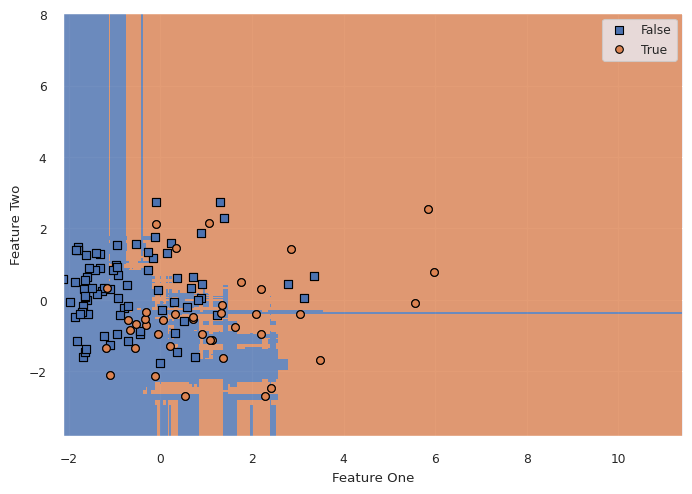

In [ ]:
plot_model(blender, plot = 'boundary')

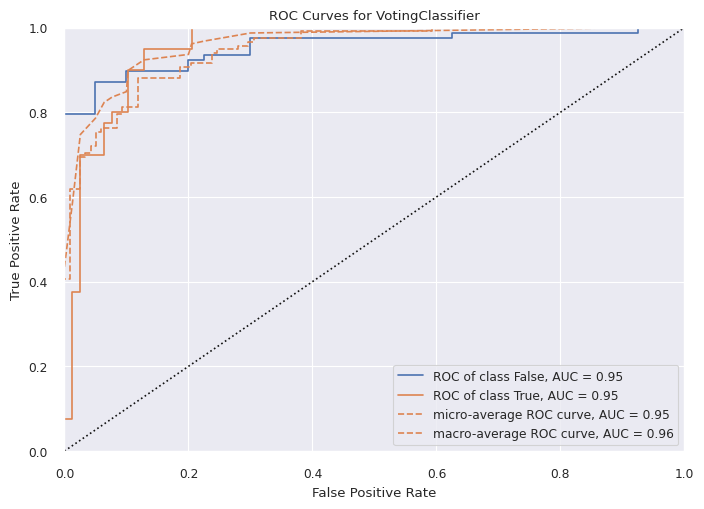

In [ ]:
plot_model(blender, plot = 'auc')

In [ ]:
predictions = predict_model(blender)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8814,0.9542,0.7000,0.9333,0.8000,0.7181,0.7331


,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis,prediction_label,prediction_score
sample_id,,,,,,,,,,,
S257,36,F,17.00,0.16965,0.480592,19.861000,10.060000,NaN,False,0,0.9875
S230,48,M,NaN,1.30065,3.067997,459.057892,653.255005,5471.592773,False,0,0.9024
S543,77,F,12.00,0.72384,9.565750,193.089005,844.044006,NaN,True,0,0.8036
S450,70,M,1806.00,0.26013,4.420057,173.312714,774.040283,447.050995,True,1,0.9919
S451,72,M,328.00,1.00659,3.402084,241.579239,2428.988037,876.901001,True,0,0.6463
...,...,...,...,...,...,...,...,...,...,...,...
S246,68,M,11.00,0.76908,4.885849,143.509995,780.348022,NaN,False,0,0.9312
S34,46,M,6.58,0.35061,0.001402,2.191019,33.193840,0.000000,False,0,0.9929
S410,75,M,255.00,0.91611,2.567346,15.695743,297.009735,98.199997,True,1,0.8859


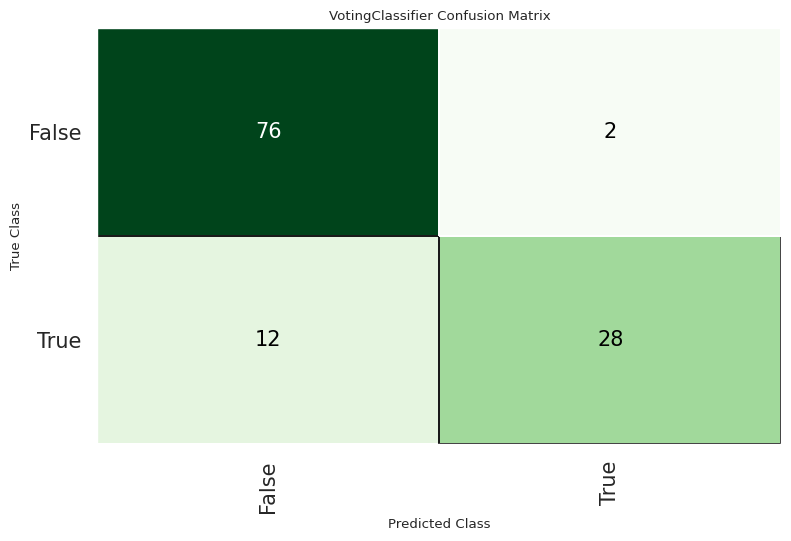

In [ ]:
plot_model(blender, plot = 'confusion_matrix')

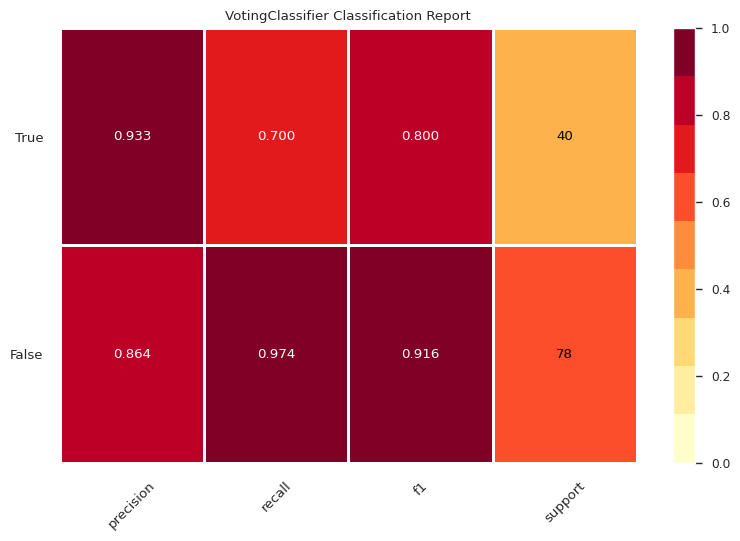

In [ ]:
plot_model(blender, plot = 'class_report')
